In [1]:
import tensorflow as tf
import numpy as np
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

input_x_dim = x_train.shape[1]
input_y_dim = x_train.shape[2]
input_dim = input_x_dim * input_y_dim

x_train = np.reshape(x_train, (len(x_train), input_dim))
x_test = np.reshape(x_test, (len(x_test), input_dim))

hidden_code_dim = 16

In [2]:
from mlp_vae import MLPVariationalAutoEncoder

In [3]:
model = MLPVariationalAutoEncoder(input_dim, hidden_code_dim, final_activation=tf.nn.sigmoid)
model.train(x_train, x_test, 25, 512, tf.keras.optimizers.Adam(learning_rate=0.001))

Epoch 1 of 25 completed, training loss = 0.10999465733766556, validation loss = 0.046085063368082047
Epoch 2 of 25 completed, training loss = 0.045348603278398514, validation loss = 0.03796634078025818
Epoch 3 of 25 completed, training loss = 0.03750241920351982, validation loss = 0.032346341758966446
Epoch 4 of 25 completed, training loss = 0.03217107057571411, validation loss = 0.02769065462052822
Epoch 5 of 25 completed, training loss = 0.02857421524822712, validation loss = 0.024579457938671112
Epoch 6 of 25 completed, training loss = 0.026027556508779526, validation loss = 0.022303594276309013
Epoch 7 of 25 completed, training loss = 0.024108141660690308, validation loss = 0.02063940465450287
Epoch 8 of 25 completed, training loss = 0.02257082797586918, validation loss = 0.019609492272138596
Epoch 9 of 25 completed, training loss = 0.021354224532842636, validation loss = 0.018856240436434746
Epoch 10 of 25 completed, training loss = 0.02038467489182949, validation loss = 0.0182516

In [4]:
import matplotlib.pyplot as plt
import random

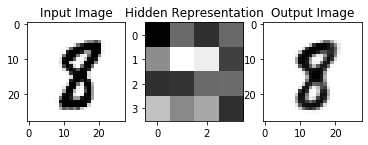

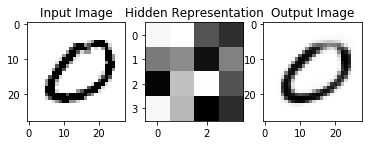

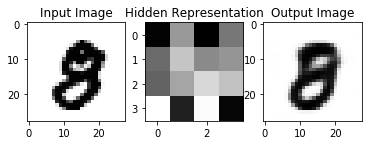

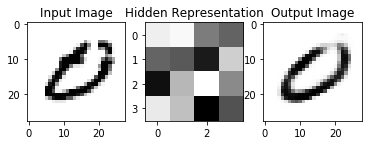

In [5]:
for _ in range(4):
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    test_case = x_test[random.randrange(x_test.shape[0])]
    test_case_img = np.reshape(test_case, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(test_case_img, cmap='Greys')

    plt.subplot(1, 3, 2)
    plt.title("Hidden Representation")
    encoded_dist = model.encode(np.array([test_case]))
    encoded = encoded_dist.sample()
    # The reshape command makes the 16-long hidden code by 4x4
    # so we can see it alongside the input and output
    encoded_img = np.reshape(tf.nn.sigmoid(encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(encoded_img, cmap='Greys')

    plt.subplot(1, 3, 3)
    plt.title("Output Image")
    decoded = model.decode(np.array([encoded]))
    decoded_img = np.reshape(decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(decoded_img, cmap='Greys')

    plt.show()

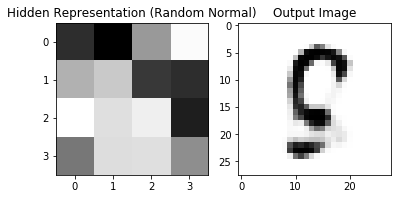

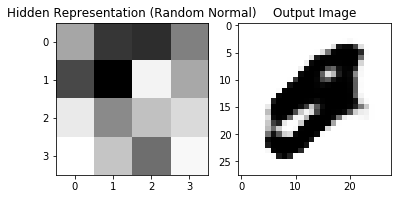

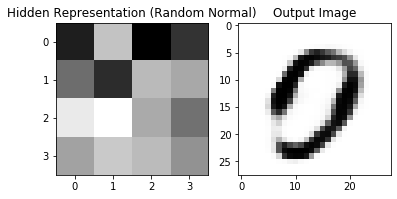

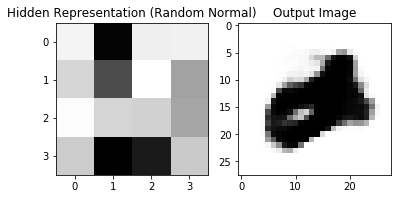

In [6]:
for _ in range(4):
    plt.subplot(1, 2, 1)
    plt.title("Hidden Representation (Random Normal)")
    random_encoded = tf.random.normal((1, 16))
    random_encoded_img = np.reshape(tf.nn.sigmoid(random_encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(random_encoded_img, cmap='Greys')

    plt.subplot(1, 2, 2)
    plt.title("Output Image")
    random_decoded = model.decode(np.array([random_encoded]))
    random_decoded_img = np.reshape(random_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(random_decoded_img, cmap='Greys')

    plt.show()

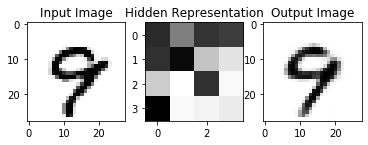

In [137]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_1 = x_test[random.randrange(x_test.shape[0])]
test_case_img_1 = np.reshape(test_case_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_1, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_1 = model.encode(np.array([test_case_1]))
encoded_1 = encoded_dist_1.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_1 = tf.reshape(tf.nn.sigmoid(encoded_1), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_1, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_1 = model.decode(np.array([encoded_1]))
decoded_img_1 = tf.reshape(decoded_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_1, cmap='Greys')

plt.show()

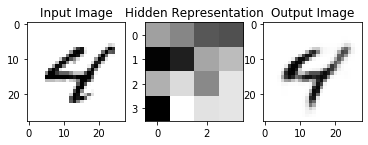

In [138]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_2 = x_test[random.randrange(x_test.shape[0])]
test_case_img_2 = np.reshape(test_case_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_2, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_2 = model.encode(np.array([test_case_2]))
encoded_2 = encoded_dist_2.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_2 = np.reshape(tf.nn.sigmoid(encoded_2), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_2, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_2 = model.decode(np.array([encoded_2]))
decoded_img_2 = np.reshape(decoded_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_2, cmap='Greys')

plt.show()

In [139]:
new_encoded = (encoded_1 + encoded_2) / 2

In [140]:
new_encoded

<tf.Tensor: id=1028687, shape=(1, 16), dtype=float32, numpy=
array([[ 0.49680153,  0.15026578,  0.81185174,  0.79659134,  1.2804791 ,
         1.3958538 , -0.3739143 , -0.7340862 , -0.47367135, -1.4357445 ,
         0.5730335 , -1.3779241 ,  1.7164581 , -1.7970607 , -1.2205377 ,
        -1.1276968 ]], dtype=float32)>

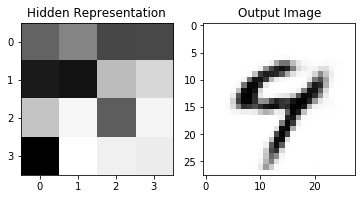

In [141]:
plt.subplot(1, 2, 1)
plt.title("Hidden Representation")
new_encoded_img = np.reshape(tf.nn.sigmoid(new_encoded), (1, 4, 4))[0] * 255.0
plt.imshow(new_encoded_img, cmap='Greys')

plt.subplot(1, 2, 2)
plt.title("Output Image")
new_decoded = model.decode(np.array([new_encoded]))
new_decoded_img = np.reshape(new_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(new_decoded_img, cmap='Greys')

plt.show()

In [142]:
encoded_1

<tf.Tensor: id=1028444, shape=(1, 16), dtype=float32, numpy=
array([[ 1.1934277 ,  0.25030744,  1.0905628 ,  0.99432486,  1.1368244 ,
         1.7337017 , -0.49696335, -1.0139898 , -0.6086191 , -1.9897354 ,
         1.13472   , -1.6961867 ,  1.9466466 , -1.7017052 , -1.4408318 ,
        -1.1883345 ]], dtype=float32)>

In [143]:
test_set_encoded = model.encode(x_test)

In [144]:
test_set_encoded

<tfp.distributions.Normal 'Normal' batch_shape=[10000, 16] event_shape=[] dtype=float32>

In [145]:
test_set_encoded[:, 0]

<tfp.distributions.Normal 'Normal' batch_shape=[10000] event_shape=[] dtype=float32>

In [146]:
tf.reduce_mean(test_set_encoded[:, 3].mean())

<tf.Tensor: id=1028983, shape=(), dtype=float32, numpy=0.009670618>

In [147]:
test_set_encoded_sampled = test_set_encoded.sample()

In [148]:
tf.reduce_mean(test_set_encoded_sampled[:, 7])

<tf.Tensor: id=1029012, shape=(), dtype=float32, numpy=-0.02457232>

In [149]:
import tensorflow_probability as tfp
emp = tfp.distributions.Empirical(tf.transpose(test_set_encoded_sampled))

In [150]:
tf.reduce_mean(tfp.distributions.kl_divergence(
                tfp.distributions.Normal(emp.mean(), emp.stddev()),
                tfp.distributions.Normal(0.0, 1.0)
            ))

<tf.Tensor: id=1029044, shape=(), dtype=float32, numpy=0.0017747689>

In [151]:
norm = tf.random.normal(test_set_encoded_sampled.shape, 0.0, 1.0)

In [152]:
norm

<tf.Tensor: id=1029050, shape=(10000, 16), dtype=float32, numpy=
array([[ 0.23303191, -0.1760622 , -0.19100532, ...,  0.63643306,
         0.36450186, -0.86845315],
       [-1.3205899 , -0.7591316 , -1.8764147 , ..., -1.3086795 ,
         0.91688406, -0.28104463],
       [-0.3240766 ,  1.223856  ,  1.6566794 , ...,  0.3491977 ,
         0.14586726, -0.53184205],
       ...,
       [-1.2846755 , -2.0755599 , -1.803221  , ...,  0.13564375,
         0.54079413, -0.36118186],
       [-0.09137182,  1.1361839 ,  0.43770903, ..., -0.42519832,
         1.5543276 ,  0.50151706],
       [-0.3371689 ,  0.18640384, -0.44798914, ...,  2.8846729 ,
        -1.5812286 , -1.0944031 ]], dtype=float32)>

In [153]:
emp_norm = tfp.distributions.Empirical(tf.transpose(norm))

In [154]:
emp_norm

<tfp.distributions.Empirical 'Empirical_Empirical' batch_shape=[16] event_shape=[] dtype=float32>

In [155]:
emp

<tfp.distributions.Empirical 'Empirical_Empirical' batch_shape=[16] event_shape=[] dtype=float32>

In [156]:
tf.reduce_sum(tfp.distributions.kl_divergence(
                tfp.distributions.Normal(emp_norm.mean(), emp_norm.stddev()),
                tfp.distributions.Normal(0.0, 1.0)
            ))

<tf.Tensor: id=1029082, shape=(), dtype=float32, numpy=0.0013286698>

In [157]:
encoded_2

<tf.Tensor: id=1028597, shape=(1, 16), dtype=float32, numpy=
array([[-0.19982462,  0.05022412,  0.5331406 ,  0.5988578 ,  1.4241338 ,
         1.0580058 , -0.25086525, -0.4541826 , -0.3387236 , -0.8817538 ,
         0.01134702, -1.0596615 ,  1.4862697 , -1.8924161 , -1.0002435 ,
        -1.0670592 ]], dtype=float32)>

In [158]:
test_set_encoded_sampled[:, 0]

<tf.Tensor: id=1029086, shape=(10000,), dtype=float32, numpy=
array([ 1.6684097 , -2.5250595 , -1.4710126 , ...,  0.9026566 ,
       -0.75516397, -2.5909474 ], dtype=float32)>

(array([  1.,   0.,   1.,   6.,   2.,   4.,  10.,  31.,  46.,  80., 107.,
        114., 118., 156., 166., 192., 203., 207., 234., 254., 285., 291.,
        320., 282., 301., 315., 363., 374., 393., 386., 417., 478., 523.,
        499., 528., 464., 420., 353., 320., 210., 167., 127., 100.,  60.,
         43.,  24.,  20.,   1.,   1.,   3.]),
 array([-3.3914661 , -3.2747407 , -3.1580153 , -3.0412898 , -2.9245644 ,
        -2.807839  , -2.6911135 , -2.574388  , -2.4576626 , -2.3409371 ,
        -2.2242117 , -2.1074862 , -1.9907607 , -1.8740352 , -1.7573098 ,
        -1.6405843 , -1.5238589 , -1.4071335 , -1.290408  , -1.1736825 ,
        -1.056957  , -0.9402316 , -0.8235061 , -0.7067807 , -0.5900552 ,
        -0.47332978, -0.35660434, -0.23987888, -0.12315342, -0.00642797,
         0.11029749,  0.22702295,  0.3437484 ,  0.46047387,  0.5771993 ,
         0.6939248 ,  0.8106502 ,  0.9273757 ,  1.0441011 ,  1.1608266 ,
         1.277552  ,  1.3942775 ,  1.5110029 ,  1.6277283 ,  1.7444539 ,
 

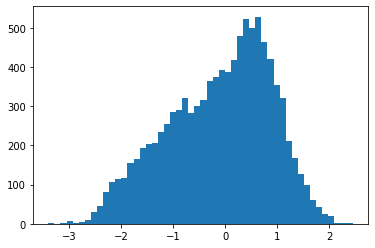

In [159]:
plt.hist(test_set_encoded_sampled[:, 0].numpy(), bins=50)

(array([  2.,   5.,   2.,   6.,   9.,   7.,  21.,  26.,  40.,  63.,  72.,
         85.,  95., 166., 179., 195., 206., 237., 260., 257., 244., 284.,
        316., 325., 324., 362., 416., 427., 483., 426., 471., 465., 455.,
        380., 386., 305., 286., 249., 243., 244., 237., 202., 153., 129.,
         86.,  71.,  54.,  21.,  15.,   8.]),
 array([-3.1596246 , -3.0477018 , -2.9357793 , -2.8238566 , -2.7119339 ,
        -2.6000113 , -2.4880886 , -2.3761659 , -2.2642434 , -2.1523206 ,
        -2.040398  , -1.9284753 , -1.8165526 , -1.7046299 , -1.5927073 ,
        -1.4807847 , -1.3688619 , -1.2569393 , -1.1450167 , -1.0330939 ,
        -0.9211713 , -0.8092486 , -0.69732594, -0.58540326, -0.4734806 ,
        -0.36155796, -0.2496353 , -0.13771263, -0.02578997,  0.0861327 ,
         0.19805536,  0.30997804,  0.4219007 ,  0.5338234 ,  0.645746  ,
         0.7576687 ,  0.86959136,  0.98151404,  1.0934367 ,  1.2053593 ,
         1.317282  ,  1.4292047 ,  1.5411273 ,  1.65305   ,  1.7649727 ,
 

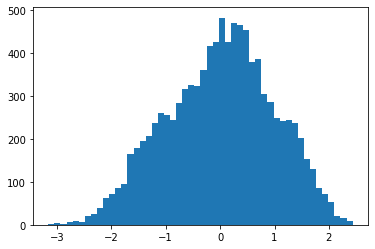

In [160]:
plt.hist(test_set_encoded_sampled[:, 1].numpy(), bins=50)

(array([  1.,   0.,  12.,  27.,  43.,  59., 125., 182., 159., 179., 202.,
        159., 161., 155., 142., 155., 159., 206., 232., 245., 314., 366.,
        399., 477., 546., 569., 539., 579., 525., 520., 500., 471., 362.,
        301., 280., 160., 155., 134.,  60.,  46.,  31.,  24.,  13.,  12.,
          4.,   5.,   2.,   2.,   0.,   1.]),
 array([-2.9041436 , -2.7850082 , -2.665873  , -2.5467377 , -2.4276025 ,
        -2.3084671 , -2.1893318 , -2.0701966 , -1.9510612 , -1.831926  ,
        -1.7127907 , -1.5936555 , -1.4745202 , -1.3553848 , -1.2362496 ,
        -1.1171143 , -0.99797904, -0.8788437 , -0.75970846, -0.64057314,
        -0.5214379 , -0.4023026 , -0.2831673 , -0.16403203, -0.04489674,
         0.07423854,  0.19337383,  0.31250912,  0.43164438,  0.5507797 ,
         0.66991496,  0.7890502 ,  0.90818554,  1.0273209 ,  1.1464561 ,
         1.2655914 ,  1.3847266 ,  1.5038619 ,  1.6229973 ,  1.7421325 ,
         1.8612678 ,  1.9804031 ,  2.0995383 ,  2.2186737 ,  2.3378088 ,
 

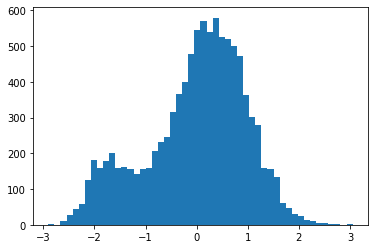

In [161]:
plt.hist(test_set_encoded_sampled[:, 2].numpy(), bins=50)

(array([1.000e+00, 3.000e+00, 3.080e+02, 1.015e+03, 1.363e+03, 1.853e+03,
        2.139e+03, 2.137e+03, 1.045e+03, 1.360e+02]),
 array([-3.5968812, -3.0036004, -2.4103196, -1.8170388, -1.223758 ,
        -0.6304772, -0.0371964,  0.5560844,  1.1493652,  1.742646 ,
         2.3359268], dtype=float32),
 <a list of 10 Patch objects>)

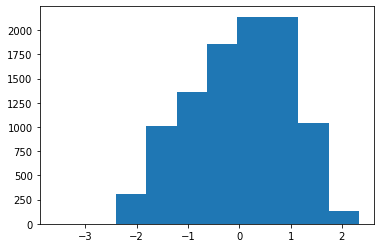

In [162]:
plt.hist(test_set_encoded_sampled[:, 3].numpy(), bins=10)